In [1]:
import pandas as pd
import json

with open('example/1565091773.json') as f:
    d = json.load(f)
with open('example/1565091777.json') as f:
    d2 = json.load(f)

In [94]:
def foo_load(val):
    df = pd.DataFrame(val)
    df["t"]=pd.to_datetime(df['t'],unit="s") 
    df.set_index("t", inplace=True)
    return df
df_w__h = foo_load(d)
df_no_h=foo_load(d2)
df = df_w__h

In [55]:
df[0:10:2]

,atm_pm1,atm_pm10,atm_pm2_5,count_0_3um,count_0_5um,count_10um,count_1um,count_2_5um,count_5um,dt
t,,,,,,,,,,
2019-08-06 11:42:53,8.0,10.0,10.0,1647.0,446.0,375.0,48.0,0.0,237.0,0.0
2019-08-06 11:42:56,8.0,10.0,10.0,1647.0,446.0,375.0,48.0,0.0,237.0,3.0
2019-08-06 11:42:59,7.0,9.0,9.0,1647.0,447.0,375.0,48.0,0.0,237.0,6.0
2019-08-06 11:43:01,8.0,10.0,10.0,1653.0,459.0,375.0,43.0,0.0,237.0,8.0
2019-08-06 11:43:04,8.0,10.0,10.0,1653.0,459.0,375.0,43.0,0.0,237.0,11.0


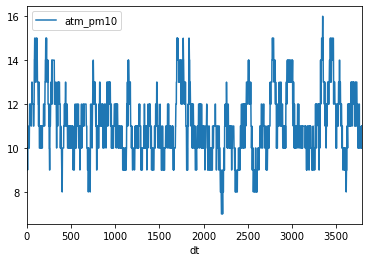

In [56]:
import matplotlib
df.plot(x="dt",y="atm_pm10")

In [57]:
from bokeh.io import output_file, show, output_notebook
from bokeh.layouts import column
from bokeh.plotting import figure

output_notebook()

s1 = figure(plot_width=800, plot_height=250, title="PM[1,2.5,10] no Hum")
s1.multi_line([df["dt"],df["dt"],df["dt"]], [df["atm_pm1"],df["atm_pm2_5"],df["atm_pm10"],], line_color=['red', 'green', 'blue'])

show(column(s1))

Loading BokehJS ...

In [33]:
pic_data=pd.read_csv("example/data.txt")
pic_data[0:1]

,t,s_pm2.5,s_pm10,b_pm2.5,b_pm10
0,2019-08-06-11-0,5.9,7.3,10.0,10.0


In [34]:
pic_data['t']=pd.to_datetime(pic_data['t'],format='%Y-%m-%d-%H-%M') 
pic_data['t'][0]

Timestamp('2019-08-06 11:00:00')

In [37]:
s2 = figure(plot_width=800, plot_height=250, title="Dane z obrazkow")
s2.multi_line([pic_data["t"],pic_data["t"],pic_data["t"],pic_data["t"]],
              [pic_data["s_pm2.5"],pic_data["s_pm10"],pic_data["b_pm2.5"],pic_data["b_pm10"]],
              line_color=['red', 'green', 'blue','gray'])

show(column(s2))

In [39]:
pic_data.describe()

,s_pm2.5,s_pm10,b_pm2.5,b_pm10
count,55.000000,55.000000,55.000000,55.000000
mean,6.287273,8.296364,9.145455,9.636364
std,0.752294,1.020523,1.007714,1.281834
min,2.500000,6.700000,7.000000,7.000000
25%,5.900000,7.550000,9.000000,9.000000
50%,6.300000,8.300000,9.000000,10.000000
75%,6.750000,8.900000,10.000000,10.500000
max,7.800000,11.200000,12.000000,12.000000


In [78]:
df["atm_pm2_5"].std()

1.2774358429146297

In [79]:
pic_data["b_pm2.5"].std()

1.0077143521297172

In [80]:
df["atm_pm10"].std()

1.4690033706882717

In [81]:
pic_data["b_pm10"].std()

1.2818337033709337

In [95]:
df_w__h[0:1]

,atm_pm1,atm_pm10,atm_pm2_5,count_0_3um,count_0_5um,count_10um,count_1um,count_2_5um,count_5um,dt
t,,,,,,,,,,
2019-08-06 11:42:53,8.0,10.0,10.0,1647.0,446.0,375.0,48.0,0.0,237.0,0.0


In [96]:
 df_no_h[0:1]

,atm_pm1,atm_pm10,atm_pm2_5,count_0_3um,count_0_5um,count_10um,count_1um,count_2_5um,count_5um,dt
t,,,,,,,,,,
2019-08-06 11:42:58,8.0,12.0,11.0,1506.0,464.0,0.0,48.0,8.0,2.0,1.0


In [100]:
# cross values
df_w__h.index[0:1]

DatetimeIndex(['2019-08-06 11:42:53'], dtype='datetime64[ns]', name='t', freq=None)

In [121]:
similar = (df_no_h - df_w__h).dropna()
similar[0:9:3]

,atm_pm1,atm_pm10,atm_pm2_5,count_0_3um,count_0_5um,count_10um,count_1um,count_2_5um,count_5um,dt
t,,,,,,,,,,
2019-08-06 11:42:59,1.0,3.0,2.0,-141.0,17.0,-375.0,0.0,8.0,-235.0,-4.0
2019-08-06 11:43:01,0.0,1.0,0.0,-177.0,-1.0,-375.0,-11.0,6.0,-235.0,-4.0
2019-08-06 11:43:05,1.0,1.0,0.0,-192.0,-4.0,-375.0,-6.0,3.0,-236.0,-4.0


In [138]:
# cross of 7003 and 5003 difference
similar.iloc[:,0:3].describe()

,atm_pm1,atm_pm10,atm_pm2_5
count,3288.000000,3288.000000,3288.000000
mean,-0.521898,-2.082421,-2.051095
std,1.252248,1.880574,1.632628
min,-4.000000,-8.000000,-7.000000
25%,-1.000000,-3.000000,-3.000000
50%,-1.000000,-2.000000,-2.000000
75%,0.000000,-1.000000,-1.000000
max,4.000000,5.000000,4.000000
